In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Load data
filename = 'droplet_data.csv'
df = pd.read_csv(filename).dropna()
data = df.to_numpy()

# Input and output extraction
x_train = data[:, 0:3]
y_train_time = data[:, 12]
y_train_vol = data[:, 11]



x_train_scaled = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)

In [72]:
# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

kernel = 1.0 * Matern(nu=0.5)

gpr_time = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha=0.1, normalize_y=True)

gpr_vol = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha=0.1, normalize_y=True)

# To store the performance scores (MSE in this case)
mse_time = []
mse_vol = []

# Perform K-Fold Cross-Validation
for train_index, test_index in kf.split(x_train_scaled):
    # Split the data into train and test sets
    X_train, X_test = x_train_scaled[train_index], x_train_scaled[test_index]
    y_time_train, y_time_test = y_train_time[train_index], y_train_time[test_index]
    y_vol_train, y_vol_test = y_train_vol[train_index], y_train_vol[test_index]
    
    gpr_time.fit(X_train, y_time_train)
    gpr_vol.fit(X_train, y_vol_train)
    
    time_pred = gpr_time.predict(X_test)
    
    # Compute the mean squared error (MSE) for the fold
    mse_t = mean_squared_error(y_time_test, time_pred)
    mse_time.append(mse_t)

    vol_pred = gpr_vol.predict(X_test)
    
    mse_v = mean_squared_error(y_vol_test, vol_pred)
    mse_vol.append(mse_v)

    r2_t = r2_score(y_time_test, time_pred)
    print("R² score(cross validation time):", r2_t)
    r2_v = r2_score(y_vol_test, vol_pred)
    print("R² score(cross validation volume):", r2_v)


avg_mse = np.mean(mse_t)
print(f"Average Mean Squared Error from Cross-Validation on time model: {avg_mse}")
avg_mse = np.mean(mse_v)
print(f"Average Mean Squared Error from Cross-Validation on vol model: {avg_mse}")

print(mse_time)
print(mse_vol)


R² score(cross validation time): 0.9908679995421799
R² score(cross validation volume): 0.9955760643083572
R² score(cross validation time): 0.9900596571010841
R² score(cross validation volume): 0.9904711534193303
R² score(cross validation time): 0.9710582045279432
R² score(cross validation volume): 0.9942661358516212
R² score(cross validation time): 0.9894156217379911
R² score(cross validation volume): 0.995857549235707
R² score(cross validation time): 0.9584747881946194
R² score(cross validation volume): 0.9961050276240698
Average Mean Squared Error from Cross-Validation on time model: 2.726550034826764e-07
Average Mean Squared Error from Cross-Validation on vol model: 2.9428855661685987e-19
[3.770926345817549e-08, 5.310846417417563e-08, 1.5382519513515116e-07, 4.567021138930136e-08, 2.726550034826764e-07]
[2.679375878021441e-19, 7.919812288043283e-19, 3.9886641427513335e-19, 3.1623745055789513e-19, 2.9428855661685987e-19]


In [73]:

gpr_time = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha=0.1, normalize_y=True)
gpr_vol = GaussianProcessRegressor(kernel=kernel, random_state=0, alpha=0.1, normalize_y=True)

gpr_time.fit(x_train_scaled, y_train_time)
gpr_vol.fit(x_train_scaled, y_train_vol)

GaussianProcessRegressor(alpha=0.1,
                         kernel=1**2 * Matern(length_scale=1, nu=0.5),
                         normalize_y=True, random_state=0)

In [102]:
Nsims = 1000000

G = np.random.uniform(10, 30, Nsims)
wave = np.random.uniform(1/300,1/100, Nsims)
Temp = np.random.uniform(66,270, Nsims)

ensembles = np.column_stack([G, wave, Temp])

ensembles_scaled = np.zeros((np.size(ensembles, 0), np.size(ensembles, 1)))

ensembles_scaled[:,0] = (ensembles[:,0]-np.mean(ensembles[:,0]))/np.std(ensembles[:,0])

print(np.mean(ensembles[:,0]), np.std(ensembles[:,0]))
print(np.mean(ensembles[:,1]), np.std(ensembles[:,1]))
print(np.mean(ensembles[:,2]), np.std(ensembles[:,2]))


ensembles_scaled[:,1] = (ensembles[:,1]-np.mean(ensembles[:,1]))/np.std(ensembles[:,1])
ensembles_scaled[:,2] = (ensembles[:,2]-np.mean(ensembles[:,2]))/np.std(ensembles[:,2])

y_hat_vol, y_sigma_vol = gpr_vol.predict(ensembles_scaled, return_std=True)


19.999447378944513 5.768587946686061
0.006663300465373236 0.001925494616510527
168.0480774355691 58.926448055308676


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def pdf_given(G, Temp):
    Nsims = 1000000

    # Fixed G and Temp arrays
    G_array = np.full(Nsims, G)
    Temp_array = np.full(Nsims, Temp)
    wave = np.random.uniform(1/300, 1/100, Nsims)

    ensembles = np.column_stack([G_array, wave, Temp_array])

    # Replace these with the same values used during training
    # These must match the ones used to train gpr_vol
    G_mean, G_std = 19.99292310090832, 5.768017604154681
    wave_mean, wave_std = np.mean(wave), np.std(wave)  # okay to compute now
    Temp_mean, Temp_std = 168.00554590178015, 58.87173432703981

    ensembles_scaled = np.zeros_like(ensembles)
    ensembles_scaled[:, 0] = (ensembles[:, 0] - G_mean) / G_std
    ensembles_scaled[:, 1] = (ensembles[:, 1] - wave_mean) / wave_std
    ensembles_scaled[:, 2] = (ensembles[:, 2] - Temp_mean) / Temp_std

    y_hat_vol, y_sigma_vol = gpr_vol.predict(ensembles_scaled, return_std=True)
    y_hat_time, y_sigma_time = gpr_time.predict(ensembles_scaled, return_std=True)

    y_hat_vol_given = y_hat_vol/sum(y_hat_vol)
    y_hat_time_given = y_hat_time/sum(y_hat_time)
    # Set style
    sns.set(style='whitegrid')


    # Create the histogram as a PDF
    plt.figure(figsize=(10, 6))
    sns.histplot(y_hat_vol_given, bins=100, stat='density', kde=True, color='skyblue', edgecolor='black')

    plt.title("PDF of y_hat_vol from GPR Predictions")
    plt.xlabel("y_hat_vol")
    plt.ylabel("Probability Density")
    plt.tight_layout()

    # Plot PDF for y_hat_time
    plt.figure(figsize=(10, 6))
    sns.histplot(y_hat_time_given, bins=100, stat='density', kde=True, color='lightcoral', edgecolor='black')
    plt.title("PDF of y_hat_time from GPR Predictions")
    plt.xlabel("y_hat_time")
    plt.ylabel("Probability Density")
    plt.tight_layout()
    plt.show()

    return y_hat_vol, y_sigma_vol, y_hat_time, y_sigma_time

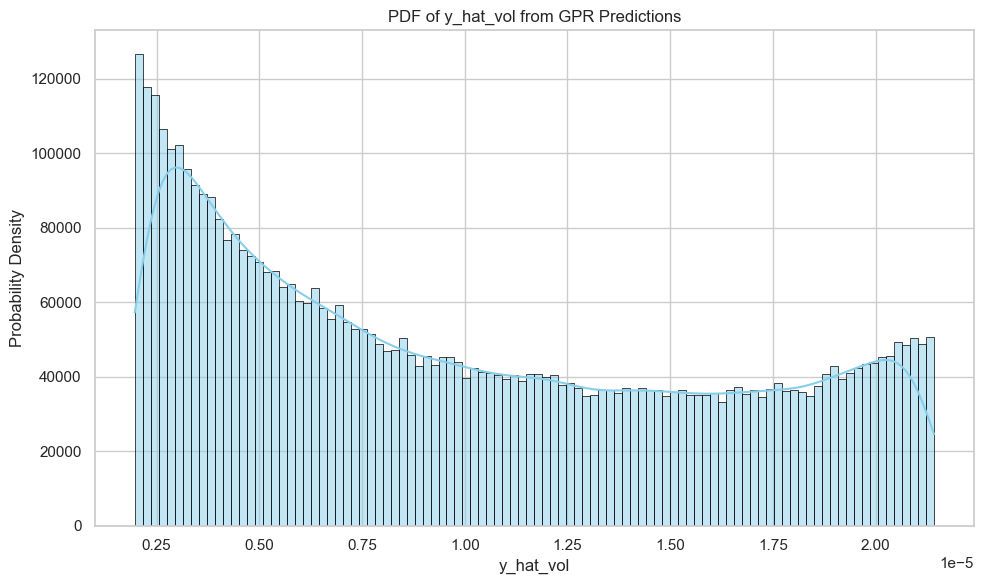

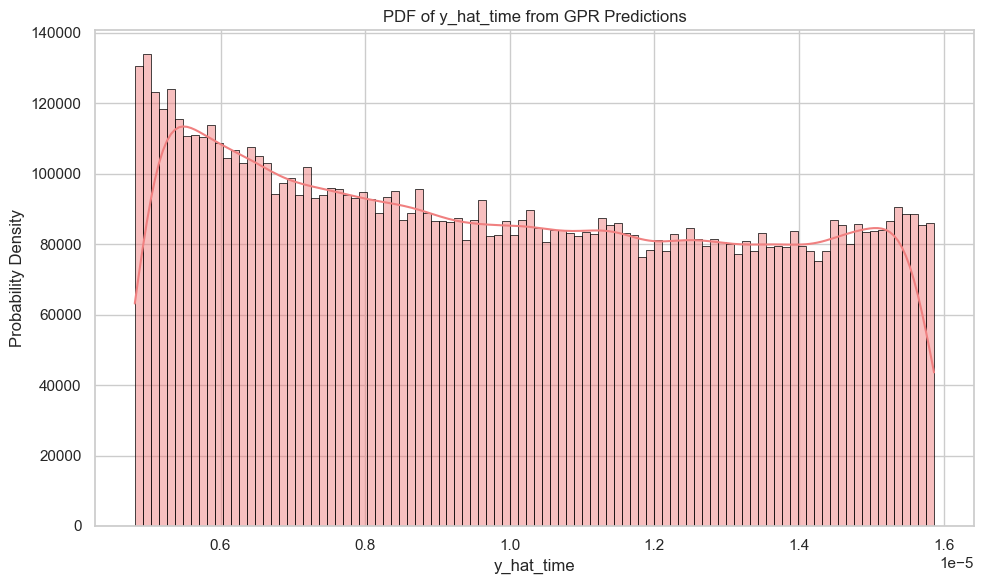

In [ ]:
y_hat_vol_given, y_sigma_vol_given, y_hat_time, y_sigma_time = pdf_given(30, 200)

In [131]:
cov_matrix = np.cov(y_hat_vol_given, y_hat_time)
covariance = cov_matrix[0, 1]
print(covariance)

1.267904207560574e-11


1.3903722357529268e-08


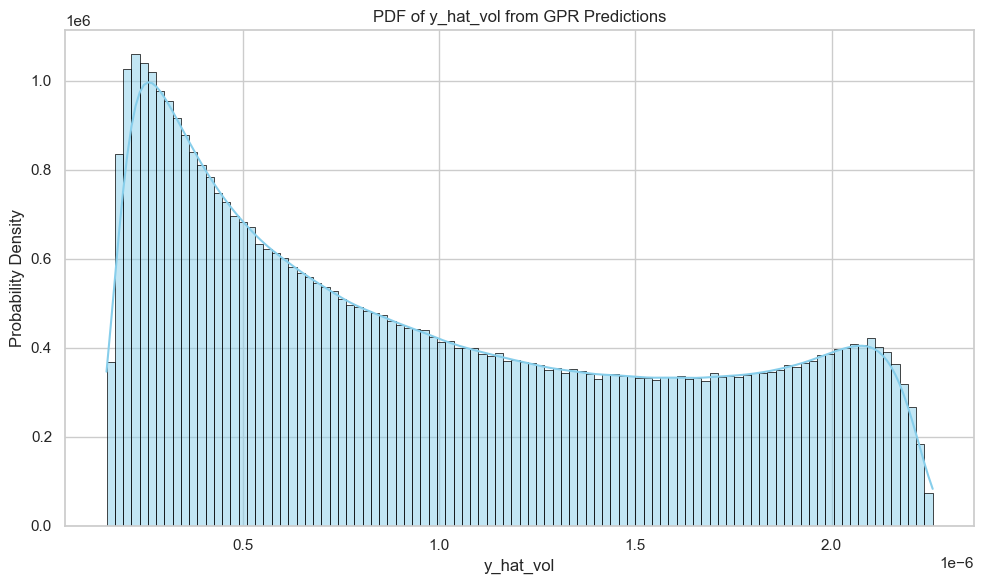

In [ ]:

print(sum(y_hat_vol)/len(y_hat_vol))
y_hat_vol = y_hat_vol/sum(y_hat_vol)
# Set style
sns.set(style='whitegrid')


# Create the histogram as a PDF
plt.figure(figsize=(10, 6))
sns.histplot(y_hat_vol, bins=100, stat='density', kde=True, color='skyblue', edgecolor='black')

plt.title("PDF of y_hat_vol from GPR Predictions")
plt.xlabel("y_hat_vol")
plt.ylabel("Probability Density")
plt.tight_layout()
plt.savefig('GP_vol_PDF.png', bbox_inches='tight', dpi=800)
plt.show()

In [7]:
from scipy.stats import gaussian_kde
kde = gaussian_kde(y_hat_vol)

In [68]:
def pdf_given_mass_num_droplets(mass, num_droplets, tolerance):
    accepted_masses = []
    for i in range(100):
        sample = kde.resample(num_droplets)[0] # extract scalar from 2D array
        if np.isclose(np.sum(sample), mass, atol=tolerance):
            accepted_masses.extend(sample)
        
    accepted_masses = np.array(accepted_masses)

    accepted_masses = accepted_masses/sum(accepted_masses)

    # Plot the histogram of your samples
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.histplot(accepted_masses, bins=100, stat='density', kde=True, color='skyblue', edgecolor='black')

    plt.title("PDF of mass_distribution given total mass")
    plt.xlabel("Sampled volume")
    plt.ylabel("Probability Density")
    plt.tight_layout()
    plt.show()
    print(sum(accepted_masses)/len(accepted_masses))
    return accepted_masses
        

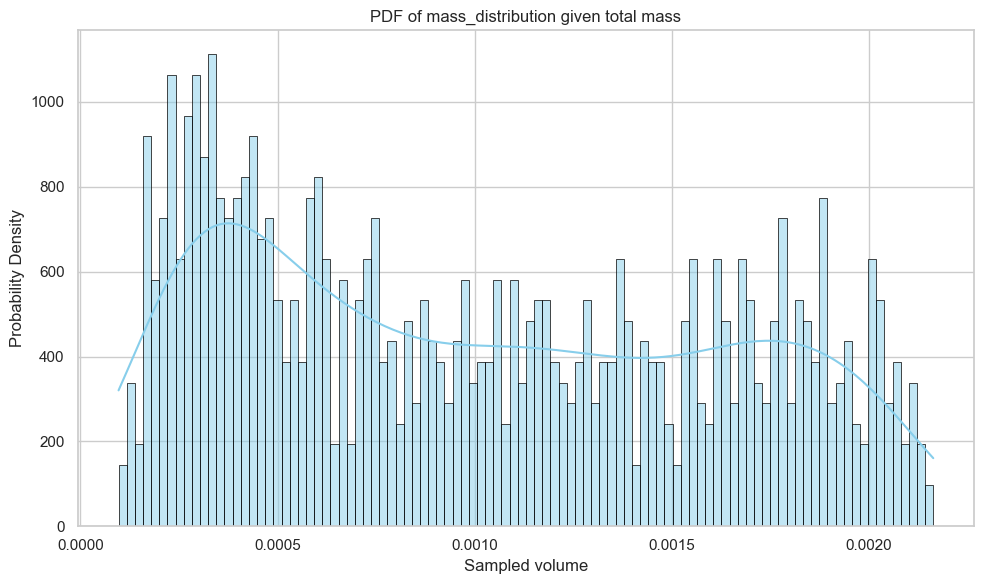

0.001000000000000001


array([1.44339429e-03, 1.79147981e-03, 9.57801018e-04, 6.96892143e-04,
       1.56594041e-03, 1.62061301e-03, 1.48628690e-03, 7.11752687e-04,
       1.29196568e-03, 4.95792748e-04, 7.29594151e-04, 4.03125714e-04,
       2.77677827e-04, 1.73939988e-03, 1.17652340e-03, 2.00601792e-04,
       1.62790801e-04, 2.06870659e-03, 4.22269338e-04, 2.41663713e-04,
       1.48440859e-03, 1.00079802e-03, 4.11450189e-04, 1.49024231e-03,
       1.37526764e-03, 3.25869148e-04, 1.88802411e-03, 1.61424947e-03,
       7.19947935e-04, 1.39442537e-03, 7.81549166e-04, 1.67927865e-03,
       3.60504696e-04, 1.24912975e-03, 4.66073330e-04, 2.01440472e-03,
       3.97753554e-04, 1.97435291e-03, 9.46514348e-04, 9.13843886e-04,
       1.46203661e-03, 1.38938864e-03, 2.07447566e-03, 4.77399303e-04,
       3.05199105e-04, 3.23693458e-04, 1.67816845e-03, 3.60581094e-04,
       1.81860990e-04, 8.15302009e-04, 1.73479005e-03, 1.64964353e-03,
       1.89569859e-03, 9.98380780e-04, 1.17334421e-03, 1.13976183e-03,
      

In [71]:
pdf_given_mass_num_droplets(0.0015, 1000, 0.00046)

In [129]:
def drops_until_v(total_v, G, Temp):
    samples = []

    # Normalize G
    G_mean, G_std = 19.99292310090832, 5.768017604154681
    G = (G - G_mean) / G_std

    # Normalize Temp
    Temp_mean, Temp_std = 168.00554590178015, 58.87173432703981
    Temp = (Temp - Temp_mean) / Temp_std

    wave_mean, wave_std = 0.00666666666, 0.00192450089

    while len(samples) == 0 or sum(x[0] for x in samples) < total_v:
        # Generate and normalize wave
        raw_wave = np.random.uniform(1/300, 1/100)
        wave = (raw_wave - wave_mean) / wave_std

        # Predict and store results
        volume = gpr_vol.predict([[G, wave, Temp]])
        time = gpr_time.predict([[G, wave, Temp]])
        print(volume)
        samples.append([volume, time])

    print(sum(x[1] for x in samples))

In [132]:
drops_until_v(.00001, 19, 168)

[6.39740379e-09]
[7.13064641e-09]
[1.07531748e-08]
[1.17760664e-08]
[1.70996234e-08]
[2.64574607e-08]
[1.99539615e-08]
[2.64417548e-08]
[2.99415718e-08]
[1.74567673e-08]
[2.99045116e-08]
[2.95695362e-08]
[2.32743252e-08]
[2.45289908e-08]
[2.279288e-08]
[1.1539436e-08]
[2.05716842e-08]
[1.20377435e-08]
[2.68515124e-09]
[5.44764993e-09]
[2.79292028e-08]
[1.97491059e-08]
[1.25610623e-08]
[2.76086603e-08]
[1.10502462e-08]
[2.63070826e-09]
[1.55506928e-08]
[2.71587306e-08]
[9.2359354e-09]
[1.54271391e-08]
[2.5474363e-08]
[4.23197323e-09]
[7.65083734e-09]
[1.31819474e-08]
[2.58441273e-08]
[9.61074145e-09]
[1.78703826e-08]
[2.53920268e-08]
[7.65346059e-09]
[3.42434386e-09]
[2.43126984e-08]
[1.32157336e-08]
[9.51818788e-09]
[2.61817102e-08]
[4.65240009e-09]
[5.19657847e-09]
[1.29868905e-08]
[3.73538609e-09]
[1.60051816e-08]
[2.69519762e-08]
[2.92616892e-08]
[2.05287135e-08]
[2.87486081e-09]
[3.58180265e-09]
[5.31144262e-09]
[2.23728728e-08]
[2.02739209e-08]
[8.38417255e-09]
[2.99903782e-08]
[2